In [98]:
%logstop
%logstart -rtq ~/.logs/DS_Basic_DS_Modules.py append
import seaborn as sns
sns.set()

In [3]:
import expectexception

# Basic data tools: NumPy, Matplotlib, Pandas

Python is a powerful and flexible programming language, but it doesn't have built-in tools for mathematical analysis or data visualization. For most data analysis we will rely on some helpful libraries. We'll explore three libraries that are very common for data analysis and visualization.

## NumPy

First among these is NumPy. The main NumPy features are three-fold: its mathematical functions (e.g. `sin`, `log`, `floor`), its `random` submodule (useful for random sampling), and the NumPy `ndarray` object.

A NumPy array is similar to a mathematical n-dimensional matrix. For example, 

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$$

A NumPy array could be 1-dimensional (e.g. [1, 5, 20, 34, ...]), 2-dimensional (as above), or many dimensions. It's important to note that all the rows and columns of the 2-dimensional array are the same length. That will be true for all dimensions of arrays.

Let's contrast this with lists.

In [4]:
# to access NumPy, we have to import it
import numpy as np

In [5]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [6]:
an_array = np.array(list_of_lists)
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(non_rectangular)

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]


In [8]:
non_rectangular_array = np.array(non_rectangular)
print(non_rectangular_array)

[list([1, 2]) list([3, 4, 5]) list([6, 7, 8, 9])]


<ipython-input-8-4acebf048af6>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  non_rectangular_array = np.array(non_rectangular)


Why did these print differently? Let's investigate their _shape_ and _data type_ (`dtype`).

In [9]:
print(an_array.shape, an_array.dtype)
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int64
(3,) object


The first case, `an_array`, is a 2-dimensional 3x3 array (of integers). In contrast, `non_rectangular_array` is a 1-dimensional length 3 array (of _objects_, namely `list` objects).

We can also create a variety of arrays with NumPy's convenience functions.

In [10]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [11]:
np.arange(1, 10, 1) 

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.logspace(1, 10, 10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

In [13]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [15]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

We can also convert the `dtype` of an array after creation.

In [16]:
print(np.logspace(1, 10, 10).dtype)
print(np.logspace(1, 10, 10).astype(int).dtype)

float64
int64


In [17]:
#Boolean to Float Array
np.array([False,True]).astype(float)

array([0., 1.])

Why does any of this matter?

Arrays are often more efficient in terms of code as well as computational resources for certain calculations. Computationally this efficiency comes from the fact that we pre-allocate a contiguous block of memory for the results of our computation.

To explore the advantages in code, let's try to do some math on these numbers.

First let's simply calculate the sum of all the numbers and look at the differences in the necessary code for `list_of_lists`, `an_array`, and `non_rectangular_array`.

In [18]:
list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [19]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum()) 

45
45


In [20]:
an_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [21]:
#Sum of Columns Will Have Iterations
[sum(inner_list) for inner_list in list_of_lists]

[6, 15, 24]

In [22]:
an_array.sum(axis=1)

array([ 6, 15, 24])

In [23]:
an_array.sum(axis=0)

array([12, 15, 18])

Summing the numbers in an array is much easier than for a list of lists. We don't have to dig into a hierarchy of lists, we just use the `sum` method of the `ndarray`. Does this still work for `non_rectangular_array`?

In [24]:
# what happens here?
print(non_rectangular_array.sum())

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Remember `non_rectangular_array` is a 1-dimensional array of `list` objects. The `sum` method tries to add them together: first list + second list + third list. Addition of lists results in _concatenation_.

In [25]:
# concatenate three lists
print([1, 2] + [3, 4, 5] + [6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


The contrast becomes even more clear when we try to sum rows or columns individually.

In [26]:
print('Array row sums: ', an_array.sum(axis=1))
print('Array column sums: ', an_array.sum(axis=0))

Array row sums:  [ 6 15 24]
Array column sums:  [12 15 18]


In [27]:
print('List of list row sums: ', [sum(inner_list) for inner_list in list_of_lists])

def column_sum(list_of_lists):
    running_sums = [0] * len(list_of_lists[0])
    for inner_list in list_of_lists:
        for i, number in enumerate(inner_list):
            running_sums[i] += number
            
    return running_sums

print('List of list column sums: ', column_sum(list_of_lists))

List of list row sums:  [6, 15, 24]
List of list column sums:  [12, 15, 18]


Generally it is much more natural to do mathematical operations with arrays than lists.

In [28]:
a = np.array([1, 2, 3, 4, 5])
print(a + 5) # add a scalar
print(a * 5) # multiply by a scalar
print(a / 5) # divide by a scalar (note the float!)

[ 6  7  8  9 10]
[ 5 10 15 20 25]
[0.2 0.4 0.6 0.8 1. ]


In [29]:
b = a + 1
print(a + b) # add together two arrays
print(a * b) # multiply two arrays (element-wise)
print(a / b.astype(float)) # divide two arrays (element-wise)

[ 3  5  7  9 11]
[ 2  6 12 20 30]
[0.5        0.66666667 0.75       0.8        0.83333333]


Arrays can also be used for linear algebra, acting as vectors, matrices, tensors, etc.

In [30]:
a

array([1, 2, 3, 4, 5])

In [31]:
b

array([2, 3, 4, 5, 6])

In [32]:
print(np.dot(a, b)) # inner product of two arrays
print(np.outer(a, b)) # outer product of two arrays

70
[[ 2  3  4  5  6]
 [ 4  6  8 10 12]
 [ 6  9 12 15 18]
 [ 8 12 16 20 24]
 [10 15 20 25 30]]


Arrays have a lot to offer us in terms of representing and analyzing data, since we can easily apply mathematical functions to data sets or sections of data sets. Most of the time we won't run into any trouble using arrays, but it's good to be mindful of the restrictions around shape and datatype.

These restrictions around `shape` and `dtype` allow the `ndarray` objects to be much more performant compared to a general Python `list`.  There are few reasons for this, but the main two result from the typed nature of the `ndarray`, as this allows contiguous memory storage and consistent function lookup.  When a Python `list` is summed, Python needs to figure out at runtime the correct way in which to add each element of the list together.  When an `ndarray` is summed, `NumPy` already knows the type of the each element (and they are consistent), thus it can sum them without checking the correct add function for each element.

Lets see this in action by doing some basic profiling.  First we will create a list of 100000 random elements and then time the sum function.

In [33]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [34]:
%%timeit 
sum(time_list)

652 µs ± 81.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%%timeit
np.sum(time_arr)

52.8 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Universal functions

`NumPy` defines a `ufunc` which allows it to efficiently run functions over arrays.  Many of these functions are built in, such as `np.cos`, and implemented in highly performance compiled `C` code.  These functions can perform `broadcasting` which allows them to automatically handle operations between arrays of different shapes, for example two arrays with the same shape, or an array and a scalar.

### Changing Shape

Often we will want to take arrays that are one shape and transform them to a different shape more amenable to a specific operation.

In [36]:
mat = np.random.rand(20, 10)

In [37]:
mat

array([[0.33563135, 0.18119902, 0.90079273, 0.45330777, 0.81073502,
        0.60894448, 0.5087079 , 0.41191653, 0.10527886, 0.19633917],
       [0.25093936, 0.75011763, 0.38185572, 0.39597109, 0.40402804,
        0.27172619, 0.66833727, 0.88427278, 0.52472329, 0.6292168 ],
       [0.89479958, 0.22148821, 0.86404456, 0.29761074, 0.01258377,
        0.51762038, 0.55625767, 0.98091572, 0.42864816, 0.68621976],
       [0.33340618, 0.24295016, 0.42552736, 0.56954292, 0.91260089,
        0.59569756, 0.31632152, 0.49791239, 0.780362  , 0.39524754],
       [0.08712467, 0.71708014, 0.4257744 , 0.1436448 , 0.09133788,
        0.46002012, 0.28901838, 0.30270985, 0.29158149, 0.50395989],
       [0.84091917, 0.17789353, 0.56838399, 0.03122065, 0.09091004,
        0.29318494, 0.82491055, 0.93496292, 0.94538877, 0.10125131],
       [0.90991414, 0.9986568 , 0.04105504, 0.30569387, 0.57815122,
        0.70061904, 0.34233229, 0.75149735, 0.10232433, 0.94155281],
       [0.79672188, 0.34417176, 0.0668210

In [38]:
mat.reshape(40, 5).shape

(40, 5)

In [39]:
mat.reshape(40, 5)

array([[0.33563135, 0.18119902, 0.90079273, 0.45330777, 0.81073502],
       [0.60894448, 0.5087079 , 0.41191653, 0.10527886, 0.19633917],
       [0.25093936, 0.75011763, 0.38185572, 0.39597109, 0.40402804],
       [0.27172619, 0.66833727, 0.88427278, 0.52472329, 0.6292168 ],
       [0.89479958, 0.22148821, 0.86404456, 0.29761074, 0.01258377],
       [0.51762038, 0.55625767, 0.98091572, 0.42864816, 0.68621976],
       [0.33340618, 0.24295016, 0.42552736, 0.56954292, 0.91260089],
       [0.59569756, 0.31632152, 0.49791239, 0.780362  , 0.39524754],
       [0.08712467, 0.71708014, 0.4257744 , 0.1436448 , 0.09133788],
       [0.46002012, 0.28901838, 0.30270985, 0.29158149, 0.50395989],
       [0.84091917, 0.17789353, 0.56838399, 0.03122065, 0.09091004],
       [0.29318494, 0.82491055, 0.93496292, 0.94538877, 0.10125131],
       [0.90991414, 0.9986568 , 0.04105504, 0.30569387, 0.57815122],
       [0.70061904, 0.34233229, 0.75149735, 0.10232433, 0.94155281],
       [0.79672188, 0.34417176, 0.

In [40]:
%%expect_exception ValueError

mat.reshape(30, 5)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-40-61df77923c88> in <module>
----> 1 mat.reshape(30, 5)

ValueError: cannot reshape array of size 200 into shape (30,5)


In [41]:
mat.ravel().shape

(200,)

In [42]:
mat.transpose().shape

(10, 20)

### Combining arrays

In [43]:
print(a)
print(b)

[1 2 3 4 5]
[2 3 4 5 6]


In [44]:
np.hstack((a, b)) #Horizontal Stack 

array([1, 2, 3, 4, 5, 2, 3, 4, 5, 6])

In [45]:
np.vstack((a, b)) #Vertical Stack

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [46]:
np.dstack((a, b)) #Depth-WiseStack

array([[[1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6]]])

In [47]:
# Row Wise Stacking
np.stack((a,b),axis=1)

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6]])

### Basic data aggregation

Let's explore some more examples of using arrays, this time using NumPy's `random` submodule to create some "fake data". Simulating data is useful for testing and prototyping new techniques or code, and some algorithms even require random input.

In [48]:
np.random.seed(42)
jan_coffee_sales = np.random.randint(25, 200, size=(4, 7)) 
# np.random.randint(lower,upper,size=(rows,columns))
print(jan_coffee_sales)

[[127 117  39 131  96  45 127]
 [146  99 112 141 124 128 176]
 [155 174  77  26 112 182  62]
 [154  45 185  82  46 113  73]]


In [49]:
# mean sales
print('Mean coffees sold per day in January: %d' % jan_coffee_sales.mean())

Mean coffees sold per day in January: 110


In [50]:
jan_coffee_sales[1, :] #Row 1 and All Columns
jan_coffee_sales[2, :1] #Row 2 and 1st Value
jan_coffee_sales[:, :1] #All rows and 1st Columns
jan_coffee_sales[:2, :3] #1st and 2nd Row and 3 columns


array([[127, 117,  39],
       [146,  99, 112]])

In [51]:
# mean sales for Monday
print('Mean coffees sold on Monday in January: %d' % jan_coffee_sales[:, 1].mean())

Mean coffees sold on Monday in January: 108


In [52]:
# day with most sales
# remember we count dates from 1, not 0!
print('Day with highest sales was January %d' % (jan_coffee_sales.argmax() + 1))

Day with highest sales was January 24


In [53]:
# is there a weekly periodicity?
from fractions import Fraction

normalized_sales = (jan_coffee_sales - jan_coffee_sales.mean()) / abs(jan_coffee_sales - jan_coffee_sales.mean()).max()
frequencies = [Fraction.from_float(f).limit_denominator() for f in np.fft.fftfreq(normalized_sales.size)]
power = np.abs(np.fft.fft(normalized_sales.ravel()))**2
list(zip(frequencies, power))[:len(power) // 2]

[(Fraction(0, 1), 4.930380657631324e-32),
 (Fraction(1, 28), 11.81850804066758),
 (Fraction(1, 14), 3.0624177128282795),
 (Fraction(3, 28), 3.6145035763808577),
 (Fraction(1, 7), 8.992489334676053),
 (Fraction(5, 28), 3.689054592513946),
 (Fraction(3, 14), 8.363267066546037),
 (Fraction(1, 4), 16.615944819859244),
 (Fraction(2, 7), 0.6736105397207648),
 (Fraction(9, 28), 6.846412421396466),
 (Fraction(5, 14), 14.279717692527935),
 (Fraction(11, 28), 17.951272090034657),
 (Fraction(3, 7), 4.608890497088778),
 (Fraction(13, 28), 6.579601542582696)]

In [54]:
random_arr = np.random.randint(1,10,100)
random_arr[random_arr % 2 == 0]

array([4, 2, 4, 2, 2, 4, 8, 4, 2, 8, 4, 2, 6, 6, 4, 6, 2, 2, 4, 8, 8, 2,
       8, 8, 8, 8, 8, 8, 2, 8, 8, 6, 4, 4, 4, 6, 2, 6])

Some of the functions we used above do not exist in standard Python and are provided to us by NumPy. Additionally we see that we can use the shape of an array to help us compute statistics on a subset of our data (e.g. mean number of coffees sold on Mondays). But one of the most powerful things we can do to explore data is to simply visualize it.

## Matplotlib

Matplotlib is the most popular Python plotting library. It allows us to visualize data quickly by providing a variety of types of graphs (e.g. bar, scatter, line, etc.). It also provides useful tools for arranging multiple images or image components within a figure, enabling us to build up more complex visualizations as we need to.

Let's visualize some data! In the next cells, we'll generate some data. For now we'll be focusing on how the graphs are produced rather than how the data is made.

In [55]:
import matplotlib.pyplot as plt

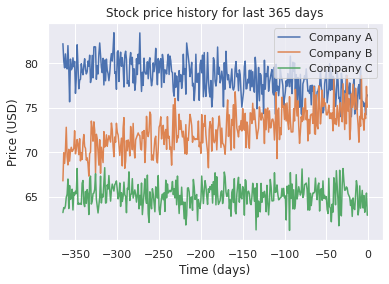

In [56]:
def gen_stock_price(days, initial_price):
    # stock price grows or shrinks linearly
    # not exceeding 10% per year (heuristic)
    trend = initial_price * (np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([1, -1]) + 1)
    # noise will be about 2%
    noise = .02 * np.random.randn(len(trend)) * trend
    return trend + noise

days = 365
initial_prices = [80, 70, 65]
for price in initial_prices:
    plt.plot(np.arange(-days, 0), gen_stock_price(days, price))
plt.title('Stock price history for last %d days' % days)
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend(['Company A', 'Company B', 'Company C']);

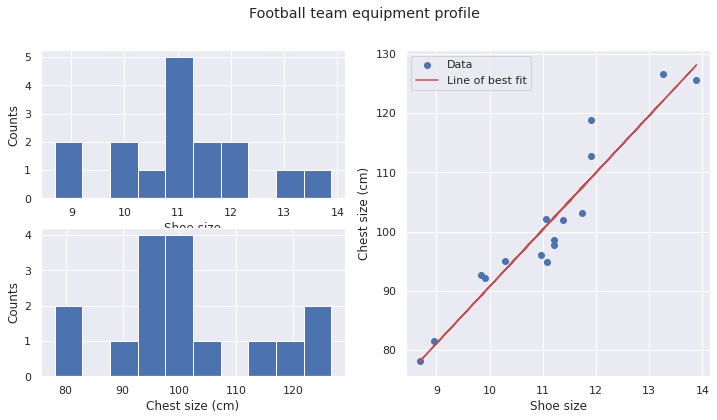

In [57]:
from scipy.stats import linregress

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jersey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)

    return shoe_sizes, jersey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Football team equipment profile')

#Create Subplots
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

#Plot The Data
ax1.hist(shoes)
ax2.hist(jerseys)
ax3.scatter(shoes, jerseys, label='Data')
fit_line = linregress(shoes, jerseys)
ax3.plot(shoes, fit_line[1] + fit_line[0] * shoes, 'r', label='Line of best fit')

#Label the Axes
ax1.set_xlabel('Shoe size')
ax1.set_ylabel('Counts')

ax2.set_xlabel('Chest size (cm)')
ax2.set_ylabel('Counts')

ax3.set_xlabel('Shoe size')
ax3.set_ylabel('Chest size (cm)')


handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1]);

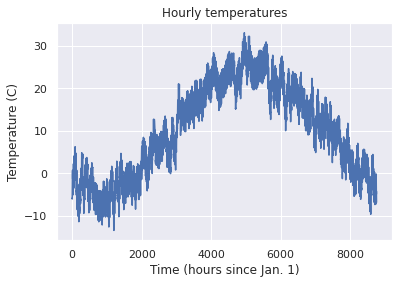

In [58]:
def gen_hourly_temps(days):
    ndays = len(days)
    seasonality = (-15 * np.cos((np.array(days) - 30) * 2.0 * np.pi / 365)).repeat(24) + 10
    solar = -3 * np.cos(np.arange(24 * ndays) * 2.0 * np.pi / 24)
    weather = np.interp(range(len(days) * 24), range(0, 24 * len(days), 24 * 2), 3 * np.random.randn(np.ceil(float(len(days)) / 2).astype(int)))
    noise = .5 * np.random.randn(24 * len(days))

    return seasonality + solar + weather + noise

days = np.arange(365)
hours = np.arange(days[0] * 24, (days[-1] + 1) * 24)
plt.plot(hours, gen_hourly_temps(days))
plt.title('Hourly temperatures')
plt.xlabel('Time (hours since Jan. 1)')
plt.ylabel('Temperature (C)');

In the examples above we've made use of the ubiquitous `plot` command, `subplot` for arranging multiple plots in one image, and `hist` for creating histograms. We've also used both the "state machine" (i.e. using a sequence of `plt.method` commands) and "object-oriented" (i.e. creating figure objects and mutating them) plotting paradigms. The Matplotlib package is very flexible and the possibilities for visualizing data are mostly limited by imagination. A great way to explore Matplotlib and other data visualization packages is by consulting their [gallery pages](https://matplotlib.org/gallery.html).

# Pandas

NumPy is useful for handling data as it lets us efficiently apply functions to whole data sets or select pieces of them. However, it can be difficult to keep track of related data that might be stored in different arrays, or the meaning of data stored in different rows or columns of the same array.

For example, in the previous section we had a 1-dimensional array for shoe sizes, and another 1-dimensional array for jersey sizes. If we wanted to look up the shoe and jersey size for a particular player, we'd have to remember his position in each array.

Alternatively, we could combine the two 1-dimensional arrays to make a 2-dimensional array with `n_players` rows and two columns (one for shoe size, one for jersey size). But once we combine the data, we now have to remember which column is shoe size and which column is jersey size.

The Pandas package introduces a very powerful tool for working with data in Python: the DataFrame. A DataFrame is a table. Each column represents a different type of data (sometimes called a **field**). The columns are named, so I could have a column called `'shoe_size'` and a column called `'jersey_size'`. I don't have to remember which column is which, because I can refer to them by name. Each row represents a different **record** or **entity** (e.g. player). I can also name the rows, so instead of remembering which row in my array corresponds with Ronaldinho, I can name the row 'Ronaldinho' and look up his shoe size and jersey size by name.

In [79]:
import pandas as pd

players = ['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane', 'Didier Drogba', 'Ronaldo', 'Yaya Toure', 
           'Frank Rijkaard', 'Diego Maradona', 'Mohamed Aboutrika', "Samuel Eto'o", 'George Best', 'George Weah', 
           'Roberto Donadoni']
shoes, jerseys = gen_football_team(len(players), 10, 100)

df = pd.DataFrame({'shoe_size': shoes, 'jersey_size': jerseys}, index = players)

df

,shoe_size,jersey_size
Ronaldinho,6.335282,62.244952
Pele,9.994207,106.897040
Lionel Messi,9.141059,92.117992
Zinedine Zidane,10.218727,108.847431
Didier Drogba,11.638941,122.621220
Ronaldo,10.028551,93.912908
Yaya Toure,9.459261,96.892588
Frank Rijkaard,7.895093,87.577363
Diego Maradona,9.836085,93.367599
Mohamed Aboutrika,11.008417,105.152292


In [80]:
# we can also make a dataframe using zip

df = pd.DataFrame(list(zip(shoes, jerseys)), columns = ['shoe_size', 'jersey_size'], index = players)

df

,shoe_size,jersey_size
Ronaldinho,6.335282,62.244952
Pele,9.994207,106.897040
Lionel Messi,9.141059,92.117992
Zinedine Zidane,10.218727,108.847431
Didier Drogba,11.638941,122.621220
Ronaldo,10.028551,93.912908
Yaya Toure,9.459261,96.892588
Frank Rijkaard,7.895093,87.577363
Diego Maradona,9.836085,93.367599
Mohamed Aboutrika,11.008417,105.152292


The DataFrame has similarities to both a `dict` and a NumPy `ndarray`. For example, we can retrieve a column from the DataFrame by using its name, just like we would retrieve an item from a `dict` using its key.

In [81]:
print(df['shoe_size'])

Ronaldinho            6.335282
Pele                  9.994207
Lionel Messi          9.141059
Zinedine Zidane      10.218727
Didier Drogba        11.638941
Ronaldo              10.028551
Yaya Toure            9.459261
Frank Rijkaard        7.895093
Diego Maradona        9.836085
Mohamed Aboutrika    11.008417
Samuel Eto'o          8.738368
George Best           6.994990
George Weah          13.411360
Roberto Donadoni     10.502763
Name: shoe_size, dtype: float64


And we can easily apply functions to the DataFrame, just like we would with a NumPy array.

In [82]:
print(np.log(df))

                   shoe_size  jersey_size
Ronaldinho          1.846134     4.131077
Pele                2.302006     4.671866
Lionel Messi        2.212776     4.523070
Zinedine Zidane     2.324222     4.689947
Didier Drogba       2.454356     4.809100
Ronaldo             2.305436     4.542368
Yaya Toure          2.246994     4.573603
Frank Rijkaard      2.066241     4.472523
Diego Maradona      2.286058     4.536544
Mohamed Aboutrika   2.398660     4.655410
Samuel Eto'o        2.167723     4.422421
George Best         1.945194     4.309483
George Weah         2.596102     4.909234
Roberto Donadoni    2.351638     4.557541


In [83]:
df.mean()

shoe_size       9.657365
jersey_size    97.015382
dtype: float64

We'll explore applying functions and analyzing data in a DataFrame in more depth later on. First we need to know how to retrieve, add, and remove data from a DataFrame.

We've already seen how to retrieve a column, what about retrieving a row? The most flexible syntax is to use the DataFrame's `loc` method.

In [84]:
print(df.loc['Ronaldo'])

shoe_size      10.028551
jersey_size    93.912908
Name: Ronaldo, dtype: float64


In [85]:
print(df.loc[['Ronaldo', 'George Best'], 'shoe_size'])

Ronaldo        10.028551
George Best     6.994990
Name: shoe_size, dtype: float64


In [86]:
# can also select position-based slices of data
print(df.loc['Ronaldo':'George Best', 'shoe_size'])

Ronaldo              10.028551
Yaya Toure            9.459261
Frank Rijkaard        7.895093
Diego Maradona        9.836085
Mohamed Aboutrika    11.008417
Samuel Eto'o          8.738368
George Best           6.994990
Name: shoe_size, dtype: float64


In [87]:
# for position-based indexing, we will typically use iloc
print(df.iloc[:5])

                 shoe_size  jersey_size
Ronaldinho        6.335282    62.244952
Pele              9.994207   106.897040
Lionel Messi      9.141059    92.117992
Zinedine Zidane  10.218727   108.847431
Didier Drogba    11.638941   122.621220


In [88]:
print(df.iloc[2:4, 0])

Lionel Messi        9.141059
Zinedine Zidane    10.218727
Name: shoe_size, dtype: float64


In [89]:
# to see just the top of the DataFrame, use head
df.head()

,shoe_size,jersey_size
Ronaldinho,6.335282,62.244952
Pele,9.994207,106.897040
Lionel Messi,9.141059,92.117992
Zinedine Zidane,10.218727,108.847431
Didier Drogba,11.638941,122.621220


In [90]:
# of for the bottom use tail
df.tail()

,shoe_size,jersey_size
Mohamed Aboutrika,11.008417,105.152292
Samuel Eto'o,8.738368,83.297673
George Best,6.994990,74.401995
George Weah,13.411360,135.535531
Roberto Donadoni,10.502763,95.348771


Just as with a `dict`, we can add data to our DataFrame by simply using the same syntax as we would use to retrieve data, but matching it with an assignment.

In [91]:
# adding a new column
df['position'] = np.random.choice(['goaltender', 'defense', 'midfield', 'attack'], size=len(df))
df.head()

,shoe_size,jersey_size,position
Ronaldinho,6.335282,62.244952,attack
Pele,9.994207,106.897040,goaltender
Lionel Messi,9.141059,92.117992,goaltender
Zinedine Zidane,10.218727,108.847431,attack
Didier Drogba,11.638941,122.621220,midfield


In [92]:
# adding a new row
df.loc['Dylan'] = {'jersey_size': 91, 'shoe_size': 9, 'position': 'midfield'}
df.loc['Dylan']

shoe_size             9
jersey_size          91
position       midfield
Name: Dylan, dtype: object

In [94]:
df

,shoe_size,jersey_size,position
Ronaldinho,6.335282,62.244952,attack
Pele,9.994207,106.897040,goaltender
Lionel Messi,9.141059,92.117992,goaltender
Zinedine Zidane,10.218727,108.847431,attack
Didier Drogba,11.638941,122.621220,midfield
Ronaldo,10.028551,93.912908,goaltender
Yaya Toure,9.459261,96.892588,attack
Frank Rijkaard,7.895093,87.577363,defense
Diego Maradona,9.836085,93.367599,defense
Mohamed Aboutrika,11.008417,105.152292,attack


To delete data, we can use the DataFrame's `drop` method.

In [95]:
df.drop('Dylan')

,shoe_size,jersey_size,position
Ronaldinho,6.335282,62.244952,attack
Pele,9.994207,106.897040,goaltender
Lionel Messi,9.141059,92.117992,goaltender
Zinedine Zidane,10.218727,108.847431,attack
Didier Drogba,11.638941,122.621220,midfield
Ronaldo,10.028551,93.912908,goaltender
Yaya Toure,9.459261,96.892588,attack
Frank Rijkaard,7.895093,87.577363,defense
Diego Maradona,9.836085,93.367599,defense
Mohamed Aboutrika,11.008417,105.152292,attack


In [96]:
df.drop('position', axis=1)

,shoe_size,jersey_size
Ronaldinho,6.335282,62.244952
Pele,9.994207,106.897040
Lionel Messi,9.141059,92.117992
Zinedine Zidane,10.218727,108.847431
Didier Drogba,11.638941,122.621220
Ronaldo,10.028551,93.912908
Yaya Toure,9.459261,96.892588
Frank Rijkaard,7.895093,87.577363
Diego Maradona,9.836085,93.367599
Mohamed Aboutrika,11.008417,105.152292


Notice when we executed `df.drop('position', axis=1)`, there was an entry for `Dylan` even though we had just executed `df.drop('Dylan')`. We have to be careful when using `drop`; many DataFrame functions return a _copy_ of the DataFrame. In order to make the change permanent, we either need to reassign `df` to the copy returned by `df.drop()` or we have to use the keyword `inplace`.

In [97]:
df = df.drop('Dylan')
print(df)

                   shoe_size  jersey_size    position
Ronaldinho          6.335282    62.244952      attack
Pele                9.994207   106.897040  goaltender
Lionel Messi        9.141059    92.117992  goaltender
Zinedine Zidane    10.218727   108.847431      attack
Didier Drogba      11.638941   122.621220    midfield
Ronaldo            10.028551    93.912908  goaltender
Yaya Toure          9.459261    96.892588      attack
Frank Rijkaard      7.895093    87.577363     defense
Diego Maradona      9.836085    93.367599     defense
Mohamed Aboutrika  11.008417   105.152292      attack
Samuel Eto'o        8.738368    83.297673  goaltender
George Best         6.994990    74.401995      attack
George Weah        13.411360   135.535531      attack
Roberto Donadoni   10.502763    95.348771  goaltender


In [99]:
df.drop('position', axis=1, inplace=True)
print(df)

                   shoe_size  jersey_size
Ronaldinho          6.335282    62.244952
Pele                9.994207   106.897040
Lionel Messi        9.141059    92.117992
Zinedine Zidane    10.218727   108.847431
Didier Drogba      11.638941   122.621220
Ronaldo            10.028551    93.912908
Yaya Toure          9.459261    96.892588
Frank Rijkaard      7.895093    87.577363
Diego Maradona      9.836085    93.367599
Mohamed Aboutrika  11.008417   105.152292
Samuel Eto'o        8.738368    83.297673
George Best         6.994990    74.401995
George Weah        13.411360   135.535531
Roberto Donadoni   10.502763    95.348771


We'll explore Pandas in much more detail later in the course, since it has many powerful tools for data analysis. However, even with these tools you can already start to discover patterns in data and draw interesting conclusions.

*Copyright &copy; 2021 WorldQuant University. This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*